### 1. Напишіть код для визначення границь та кутів у зображенні за допомогою фільтра Собеля.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the original image
img = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

In [3]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, (3,3), 0)

# Convert to graycsale
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)
 
# Sobel Edge Detection
ddepth = cv2.CV_16S
sobelx = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
 
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)
    
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

In [4]:
# Corner detection
dst = cv2.cornerMinEigenVal(img_gray, 2, 3)
cv2.normalize(dst, dst, 0, 255, cv2.NORM_MINMAX)
threshold = 0.05 * dst.max()
corner_img = np.zeros_like(img)

for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i, j] > threshold:
            cv2.circle(corner_img, (j, i), 5, (255, 255, 0), 2)

In [5]:
corner_gray = cv2.cvtColor(corner_img, cv2.COLOR_BGR2GRAY)
res_img = grad + corner_gray

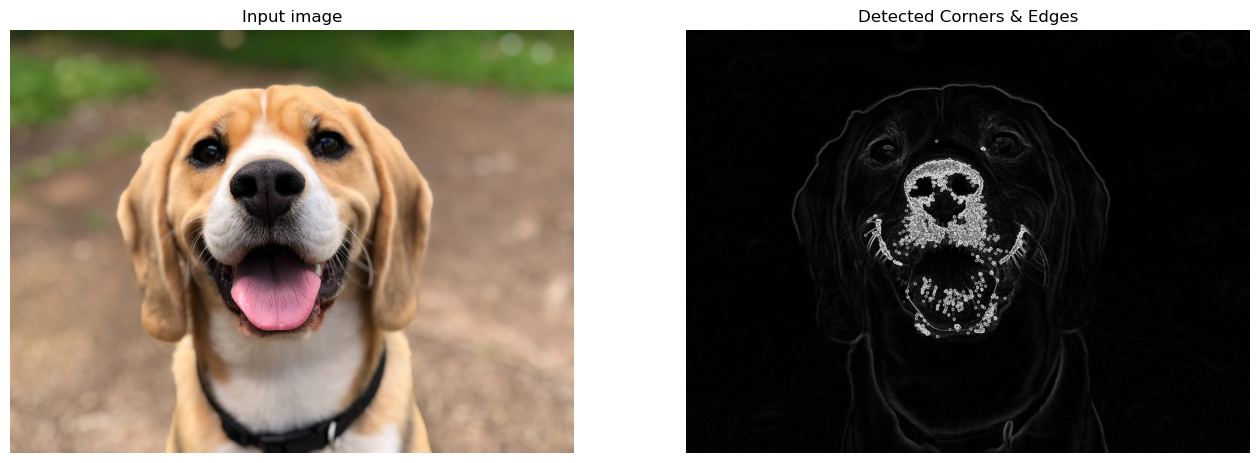

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(res_img, cmap=plt.cm.gray)
ax2.set_title('Detected Corners & Edges')
plt.show()